### Importing necessary libraries

In [147]:
import sys
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost
import lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Reading in the data

In [148]:
df_train = pd.read_csv('TrainingData.csv', index_col = 'application_key',low_memory = False)

In [3]:
label_dict = pd.read_csv('Data_Dictionary.csv')
label_dict = label_dict.set_index('Name').T.to_dict('list')
label_dict

{'application_key': ['Application ID (primary key)'],
 'mvar1': ["Credit worthiness score calculated on the basis of borrower's credit history"],
 'mvar2': ['A score calculated based on the number and riskiness of credit enquiries made to any lender by a borrower'],
 'mvar3': ['Severity of default by the borrower on any loan(s). Severity is a function of amount, time since default and number of defaults'],
 'mvar4': ['Severity of default by the borrower on auto loan(s). Severity is a function of amount, time since default and number of defaults'],
 'mvar5': ['Severity of default by the borrower on education loan(s). Severity is a function of amount, time since default and number of defaults'],
 'mvar6': ['Minimum of credit available on all revolving credit cards (in $)'],
 'mvar7': ['Maximum of credit available on all active credit lines (in $)'],
 'mvar8': ['Maximum of credit available on all active revolving credit cards (in $)'],
 'mvar9': ['Sum of available credit on credit cards t

In [4]:
df_train.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,
230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,...,10,0.63899,na,0,C,10,770,4,3080,0
230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,...,13,0.63836,na,na,L,732,437,5,2185,1
230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,...,1,1.00000,na,0,C,89,795,4,3180,1
230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,...,3,0.53241,0,0,L,3,755,4,3020,0
230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,...,1,0.92665,na,na,L,5,425,4,1700,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83000 entries, 230032 to 578068
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mvar1        83000 non-null  object 
 1   mvar2        77114 non-null  float64
 2   mvar3        82465 non-null  float64
 3   mvar4        82465 non-null  float64
 4   mvar5        82465 non-null  float64
 5   mvar6        83000 non-null  object 
 6   mvar7        83000 non-null  object 
 7   mvar8        83000 non-null  object 
 8   mvar9        83000 non-null  object 
 9   mvar10       83000 non-null  object 
 10  mvar11       83000 non-null  object 
 11  mvar12       83000 non-null  object 
 12  mvar13       83000 non-null  object 
 13  mvar14       83000 non-null  int64  
 14  mvar15       83000 non-null  object 
 15  mvar16       83000 non-null  object 
 16  mvar17       83000 non-null  object 
 17  mvar18       83000 non-null  object 
 18  mvar19       83000 non-null  object 
 19

### Data cleaning

Function for extracting non-numeric elements:

In [6]:
def get_non_numeric(elements):
    non_numerics = []
    for el in elements:
        try:
            el = float(el)
        except:
            non_numerics.append(el)
    
    return non_numerics

In [7]:
for i in range(51):
    lol =get_non_numeric(list(df_train.iloc[:, i].unique()))
    print(i, lol)

0 ['na']
1 []
2 []
3 []
4 []
5 ['missing']
6 ['missing']
7 ['missing']
8 ['missing']
9 ['missing']
10 ['missing']
11 ['missing']
12 ['missing']
13 []
14 ['missing']
15 ['na']
16 ['na']
17 ['na']
18 ['na']
19 ['na']
20 []
21 []
22 []
23 []
24 ['missing']
25 ['missing']
26 ['missing']
27 ['missing']
28 ['missing']
29 ['missing']
30 ['missing']
31 ['missing']
32 []
33 ['na']
34 ['na']
35 ['na']
36 ['na']
37 ['na']
38 ['na']
39 ['missing']
40 ['missing']
41 ['missing']
42 ['na']
43 []
44 ['na']
45 ['na']
46 ['C', 'L']
47 []
48 []
49 ['#VALUE!']
50 ['#VALUE!']


In [8]:
for i in range(51):
    lol = ['na', 'missing', '#VALUE!']
    for el in lol:
        df_train = df_train.replace(el, np.NaN)
    lol = get_non_numeric(list(df_train.iloc[:, i].unique()))
    print(i, lol)

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 []
46 ['C', 'L']
47 []
48 []
49 []
50 []


In [9]:
df_train = pd.get_dummies(df_train, columns = ['mvar47'], prefix = ['type'])
for i in range(51):
    lol =get_non_numeric(list(df_train.iloc[:, i].unique()))
    print(i, lol)
for el in list(df_train.columns):
    df_train[el] = pd.to_numeric(df_train[el])

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 []
46 []
47 []
48 []
49 []
50 []


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83000 entries, 230032 to 578068
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mvar1        79267 non-null  float64
 1   mvar2        77114 non-null  float64
 2   mvar3        82465 non-null  float64
 3   mvar4        82465 non-null  float64
 4   mvar5        82465 non-null  float64
 5   mvar6        63299 non-null  float64
 6   mvar7        75326 non-null  float64
 7   mvar8        63291 non-null  float64
 8   mvar9        71318 non-null  float64
 9   mvar10       82465 non-null  float64
 10  mvar11       36283 non-null  float64
 11  mvar12       68422 non-null  float64
 12  mvar13       73311 non-null  float64
 13  mvar14       83000 non-null  int64  
 14  mvar15       49481 non-null  float64
 15  mvar16       63757 non-null  float64
 16  mvar17       66501 non-null  float64
 17  mvar18       67641 non-null  float64
 18  mvar19       82995 non-null  float64
 19

#### Simple imputation

In [12]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer.fit(df_train)

SimpleImputer()

In [13]:
df_train_imputed = mean_imputer.transform(df_train)
df_train_imputed = pd.DataFrame(df_train_imputed, columns = df_train.columns)

In [14]:
df_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mvar1        83000 non-null  float64
 1   mvar2        83000 non-null  float64
 2   mvar3        83000 non-null  float64
 3   mvar4        83000 non-null  float64
 4   mvar5        83000 non-null  float64
 5   mvar6        83000 non-null  float64
 6   mvar7        83000 non-null  float64
 7   mvar8        83000 non-null  float64
 8   mvar9        83000 non-null  float64
 9   mvar10       83000 non-null  float64
 10  mvar11       83000 non-null  float64
 11  mvar12       83000 non-null  float64
 12  mvar13       83000 non-null  float64
 13  mvar14       83000 non-null  float64
 14  mvar15       83000 non-null  float64
 15  mvar16       83000 non-null  float64
 16  mvar17       83000 non-null  float64
 17  mvar18       83000 non-null  float64
 18  mvar19       83000 non-null  float64
 19  mvar

In [15]:
df_train_imputed['default_ind'] = df_train_imputed['default_ind'].astype('int')

## Using KNN Imputer

In [13]:
knn_imputer = KNNImputer(missing_values=np.nan, weights = 'distance')
knn_imputer.fit(df_train)

KNNImputer(weights='distance')

In [14]:
df_train_imputed = knn_imputer.transform(df_train)
df_train_imputed = pd.DataFrame(df_train_imputed, columns = df_train.columns)

In [11]:
df_train_imputed = df_train

### Data visualization

<AxesSubplot:xlabel='default_ind', ylabel='count'>

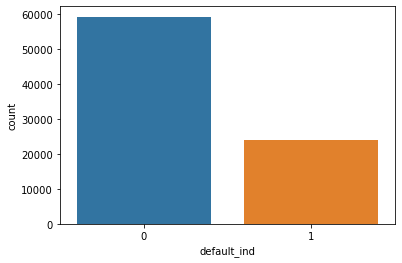

In [12]:
sns.countplot(x = 'default_ind', data = df_train_imputed)

In [13]:
df_train_imputed['default_ind'].sum()/len(df_train_imputed['default_ind'])

0.28740963855421686

In [14]:
class_weight = len(df_train_imputed['default_ind'])/df_train_imputed['default_ind'].sum() - 1
class_weight

2.479354433032907

Imbalanced dataset, though it is not that bad.

#### Todo: more visualizations

### Building models

#### Test set generation

In [15]:
x = list(df_train_imputed.columns)
x.remove('default_ind')
print(x)

['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar48', 'mvar49', 'mvar50', 'mvar51', 'type_C', 'type_L']


In [16]:
non_label_cols = list(df_train_imputed.columns)
non_label_cols.remove('default_ind')


X = df_train_imputed[non_label_cols]
y = df_train_imputed['default_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.3, random_state = 42)

In [17]:
y_test.sum()/len(y_test)

0.2873895582329317

## Using XGBoost

In [18]:
xgb_model = XGBClassifier(learning_rate = 0.01,  
                      colsample_bytree = 0.25,
                      subsample = 0.5,
                      objective = 'binary:logistic', 
                      n_estimators = 3000,
                      max_depth = 14, 
                      scale_pos_weight = 5,
                      reg_lambda = 8,
                      gamma = 4,
                      tree_method = 'gpu_hist')

# colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=3000, reg_lambda=5, subsample=0.8

In [19]:
%time xgb_model.fit(X_train, y_train)

Wall time: 33.2 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.25,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=14, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=3000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [20]:
y_pred10 = xgb_model.predict(X_train)
print(classification_report(y_pred10, y_train))
print(f1_score(y_pred10, y_train))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     35100
           1       1.00      0.73      0.84     23000

    accuracy                           0.89     58100
   macro avg       0.92      0.86      0.88     58100
weighted avg       0.91      0.89      0.89     58100

0.8409279830726214


In [21]:
y_pred11 = xgb_model.predict(X_test)
print(classification_report(y_pred11, y_test))
print(f1_score(y_pred11, y_test))

              precision    recall  f1-score   support

           0       0.72      0.87      0.78     14660
           1       0.72      0.51      0.60     10240

    accuracy                           0.72     24900
   macro avg       0.72      0.69      0.69     24900
weighted avg       0.72      0.72      0.71     24900

0.5959990802483329


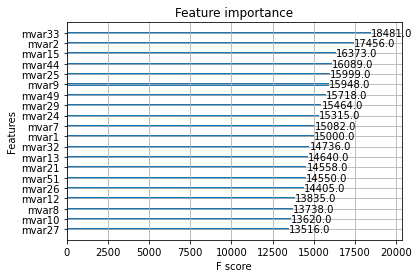

In [22]:
fig = xgboost.plot_importance(xgb_model, max_num_features = 20, importance_type = 'weight')
plt.show()

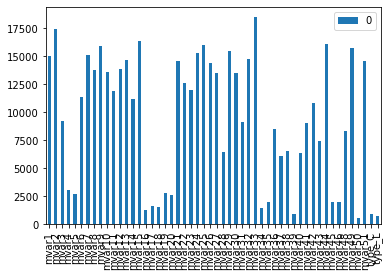

In [23]:
f_importance = xgb_model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame.from_dict(data=f_importance, orient='index')
importance_df.plot.bar()
plt.show()

## Tuning XGBoost

#### First we tune class weights

In [26]:
scale = list(range(1,8))
f_scores = []

for el in scale:
    
    tune_wt_xgb = XGBClassifier(learning_rate = 0.01,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective = 'binary:logistic', 
                      n_estimators = 3000,
                      max_depth = 10, 
                      scale_pos_weight = el,
                      gamma = 0,
                      verbosity = 2,
                      tree_method = 'gpu_hist')
    
    tune_wt_xgb.fit(X_train, y_train)
    
    y_train_pred = tune_wt_xgb.predict(X_train)
    y_test_pred = tune_wt_xgb.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

1 - Train: 0.9944137433925997 Test: 0.5196487937942205
2 - Train: 0.9948739345532575 Test: 0.5594706877981227
3 - Train: 0.9906858092074039 Test: 0.5702967444540479
4 - Train: 0.9852498672488053 Test: 0.5785783033136257
5 - Train: 0.9799595082303924 Test: 0.5826980444149817
6 - Train: 0.9738729806963318 Test: 0.5849251419721218
7 - Train: 0.967805500014489 Test: 0.5841989298079949


#### Further tuning this parameter

In [28]:
scale = [4.50, 4.75, 5.00, 5.25, 5.50, 5.75, 6.00, 6.25, 6.50, 6.75, 7.00, 7.25, 7.50]
f_scores = []

for el in scale:
    
    tune_wt_xgb = XGBClassifier(learning_rate = 0.01,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective = 'binary:logistic', 
                      n_estimators = 3000,
                      max_depth = 10, 
                      scale_pos_weight = el,
                      gamma = 0,
                      verbosity = 2,
                      tree_method = 'gpu_hist')
    
    tune_wt_xgb.fit(X_train, y_train)
    
    y_train_pred = tune_wt_xgb.predict(X_train)
    y_test_pred = tune_wt_xgb.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

4.5 - Train: 0.9827855104022599 Test: 0.5803360550644443
4.75 - Train: 0.9813416389974438 Test: 0.582227583433856
5.0 - Train: 0.9799595082303924 Test: 0.5826980444149817
5.25 - Train: 0.9779795021961932 Test: 0.5848646512546928
5.5 - Train: 0.9764926027717677 Test: 0.5835133896418516
5.75 - Train: 0.9748679179193789 Test: 0.5876469442099109
6.0 - Train: 0.9738729806963318 Test: 0.5849251419721218
6.25 - Train: 0.9718891863578163 Test: 0.5824705806700533
6.5 - Train: 0.9716064467329959 Test: 0.5841464192334672
6.75 - Train: 0.9698008014402695 Test: 0.5846251186333439
7.0 - Train: 0.967805500014489 Test: 0.5841989298079949
7.25 - Train: 0.9654275307856853 Test: 0.5843708940749546
7.5 - Train: 0.9654833487511563 Test: 0.5831466268359472


We select class_weight to be 6 (or 5) we'll see later.
Edakk eppzheluokke aayt 5 also try cheyth nokkaa.
Verthe oru rasam

In [37]:
deep = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
f_scores = []

for el in deep:
    
    tune_dp_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = 0.6,
                              subsample = 0.8,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = el, 
                              scale_pos_weight = 5,
                              gamma = 0,
                              verbosity = 2,
                              tree_method = 'gpu_hist')
    
    tune_dp_xgb.fit(X_train, y_train)
    
    y_train_pred = tune_dp_xgb.predict(X_train)
    y_test_pred = tune_dp_xgb.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

5 - Train: 0.6423321598418875 Test: 0.5714830710538865
6 - Train: 0.70200754190553 Test: 0.5787310814874211
7 - Train: 0.7806168233127095 Test: 0.5840916390108125
8 - Train: 0.8647092389894694 Test: 0.5884940386618822
9 - Train: 0.9393564356435644 Test: 0.5881616818921287
10 - Train: 0.9799595082303924 Test: 0.5826980444149817
11 - Train: 0.9939585131394899 Test: 0.5740805359759927
12 - Train: 0.9986245664394212 Test: 0.569020172910663
13 - Train: 0.9999101823298704 Test: 0.5647752394988946
14 - Train: 1.0 Test: 0.5628822915112635


Values 8 and 9 are pretty good estimates for the max_depth. Extended search from 7 to 10.

In [39]:
deep = [7, 8, 9, 10]
gams = [1, 2, 3, 4, 5, 6]
f_scores = []

for el1 in deep:
    print('***************************')
    print('Depth: ',el1)
    print('***************************')
    for el2 in gams:

        tune_dp_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = 0.6,
                              subsample = 0.8,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = el1, 
                              scale_pos_weight = 5,
                              gamma = el2,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

        tune_dp_xgb.fit(X_train, y_train)

        y_train_pred = tune_dp_xgb.predict(X_train)
        y_test_pred = tune_dp_xgb.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

        f_scores.append([el, train_f, test_f])
        print( el2,"- Train:", train_f, "Test:", test_f)

***************************
Depth:  7
***************************
1 - Train: 0.779224455137277 Test: 0.5846400856301847
2 - Train: 0.7797706140557888 Test: 0.5833467202141901
3 - Train: 0.7772154878192302 Test: 0.5839431654291971
4 - Train: 0.7631713080950836 Test: 0.5833113977362464
5 - Train: 0.7395531837916064 Test: 0.5801510917934389
6 - Train: 0.7160526548281652 Test: 0.5787553213054937
***************************
Depth:  8
***************************
1 - Train: 0.864067603297216 Test: 0.5871315225574795
2 - Train: 0.8613048194638152 Test: 0.5889620136242927
3 - Train: 0.8445999036828631 Test: 0.5870295507601206
4 - Train: 0.8127889625480076 Test: 0.5855190654617589
5 - Train: 0.7815809379727685 Test: 0.5826754739272865
6 - Train: 0.7503200438917338 Test: 0.5828935681070068
***************************
Depth:  9
***************************
1 - Train: 0.939171517759217 Test: 0.5863423760523854
2 - Train: 0.9278728606356969 Test: 0.5869043959422072
3 - Train: 0.8899021411620404 Test:

Range of gammas between 3 to 5 works best. The value of max_depth can be on higher side. 

Further tuning

In [40]:
gams = [3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6]
deep = [9, 10, 11]
f_scores = []

for el1 in deep:
    print('***************************')
    print('Depth: ',el1)
    print('***************************')
    for el2 in gams:

        tune_dp_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = 0.6,
                              subsample = 0.8,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = el1, 
                              scale_pos_weight = 5,
                              gamma = el2,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

        tune_dp_xgb.fit(X_train, y_train)

        y_train_pred = tune_dp_xgb.predict(X_train)
        y_test_pred = tune_dp_xgb.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

        f_scores.append([el, train_f, test_f])
        print( el2,"- Train:", train_f, "Test:", test_f)

***************************
Depth:  9
***************************
3 - Train: 0.8899021411620404 Test: 0.5896022289406605
3.25 - Train: 0.8779075886748764 Test: 0.5891463772367264
3.5 - Train: 0.86781848459617 Test: 0.5892857142857143
3.75 - Train: 0.8575763810307582 Test: 0.589453102536086
4 - Train: 0.847946669380693 Test: 0.5895815542271563
4.25 - Train: 0.8375694496819771 Test: 0.5879501775348025
4.5 - Train: 0.8293302770580027 Test: 0.5864981262934169
4.75 - Train: 0.818752616157388 Test: 0.588267877915028
5 - Train: 0.8099685434904532 Test: 0.5864645132937816
5.25 - Train: 0.8014102192601178 Test: 0.5873536812164971
5.5 - Train: 0.794223307946544 Test: 0.5875914386345163
5.75 - Train: 0.7872765310003804 Test: 0.5862180524102233
6 - Train: 0.7793469291524224 Test: 0.5868237814675951
***************************
Depth:  10
***************************
3 - Train: 0.9134978388138097 Test: 0.5872361077408397
3.25 - Train: 0.9036431548746819 Test: 0.5892814227349195
3.5 - Train: 0.8926441

#### Adding L2 Regularization

In [47]:
gams = [3, 3.5, 4, 4.5, 5, 5.5, 6]
lamd = [0, 1, 2, 3, 4, 5]
deep = [9, 10, 11, 12]
f_scores = []

for el1 in deep:
    print('***************************')
    print('Depth: ', el1)
    print('***************************')
    for el2 in lamd:

        tune_dp_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = 0.6,
                              subsample = 0.8,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = el1, 
                              scale_pos_weight = 5,
                              gamma = 4,
                              reg_lambda = el2,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

        tune_dp_xgb.fit(X_train, y_train)

        y_train_pred = tune_dp_xgb.predict(X_train)
        y_test_pred = tune_dp_xgb.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

        f_scores.append([el, train_f, test_f])
        print( el2,"- Train:", train_f, "Test:", test_f)

***************************
Depth:  9
***************************
0 - Train: 0.8590199412583089 Test: 0.5874447188558958
1 - Train: 0.847946669380693 Test: 0.5895815542271563
2 - Train: 0.8397842959379095 Test: 0.5887406737508479
3 - Train: 0.8338631755488247 Test: 0.588996399639964
4 - Train: 0.8282843356712928 Test: 0.5885183527305282
5 - Train: 0.8243798583948111 Test: 0.590339892665474
***************************
Depth:  10
***************************
0 - Train: 0.8840844659936942 Test: 0.5867403964939114
1 - Train: 0.8696694818058596 Test: 0.5909222990643342
2 - Train: 0.8618533257532689 Test: 0.5921987864778965
3 - Train: 0.8546605499884672 Test: 0.5903159340659341
4 - Train: 0.8492613346917982 Test: 0.5898138631951582
5 - Train: 0.8441170514378291 Test: 0.5925841544683031
***************************
Depth:  11
***************************
0 - Train: 0.9007040543821315 Test: 0.5878333832783937
1 - Train: 0.8867282966741047 Test: 0.5914810657529391
2 - Train: 0.8772243395978446 Tes

Depth 12 gives amazing results when regularized. Lets use this from now on


Lets try regularizing for higher max depths too.

In [48]:
gams = [3, 3.5, 4, 4.5, 5, 5.5, 6]
lamd = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
deep = [11, 12, 13, 14]
f_scores = []

for el1 in deep:
    print('***************************')
    print('Depth: ', el1)
    print('***************************')
    for el2 in lamd:

        tune_dp_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = 0.6,
                              subsample = 0.8,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = el1, 
                              scale_pos_weight = 5,
                              gamma = 4,
                              reg_lambda = el2,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

        tune_dp_xgb.fit(X_train, y_train)

        y_train_pred = tune_dp_xgb.predict(X_train)
        y_test_pred = tune_dp_xgb.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

        f_scores.append([el, train_f, test_f])
        print( el2,"- Train:", train_f, "Test:", test_f)

***************************
Depth:  11
***************************
0 - Train: 0.9007040543821315 Test: 0.5878333832783937
1 - Train: 0.8867282966741047 Test: 0.5914810657529391
2 - Train: 0.8772243395978446 Test: 0.5896849146277063
3 - Train: 0.8700435360671551 Test: 0.5936606152588875
4 - Train: 0.8633294528521537 Test: 0.5899263896134006
5 - Train: 0.8584218786179217 Test: 0.5916030534351145
6 - Train: 0.854552903820547 Test: 0.593325661680092
7 - Train: 0.8484910121786886 Test: 0.592478104070067
8 - Train: 0.8460426546293713 Test: 0.5925205855443734
9 - Train: 0.8423550797818623 Test: 0.5923978279508432
10 - Train: 0.8391900389888064 Test: 0.591597404076056
***************************
Depth:  12
***************************
0 - Train: 0.9122346963861345 Test: 0.5876444605796576
1 - Train: 0.8990306946688207 Test: 0.5901168014375561
2 - Train: 0.8882151121040452 Test: 0.5911330049261083
3 - Train: 0.881624461989385 Test: 0.5923431407302375
4 - Train: 0.8739856552012985 Test: 0.5931715

#### Tuning colsample_bytree

In [55]:
scale = [0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
f_scores = []

for el in scale:
    
    tune_wt_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = el,
                              subsample = 0.8,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = 14, 
                              scale_pos_weight = 5,
                              gamma = 4,
                              reg_lambda = 8,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

    
    tune_wt_xgb.fit(X_train, y_train)
    
    y_train_pred = tune_wt_xgb.predict(X_train)
    y_test_pred = tune_wt_xgb.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

0.2 - Train: 0.8145110102045797 Test: 0.59124699569616
0.25 - Train: 0.8293822374633467 Test: 0.5946986859990938
0.3 - Train: 0.8370227380982226 Test: 0.5943908151025303
0.35 - Train: 0.8457661034980622 Test: 0.5937283836753516
0.4 - Train: 0.8506356202073727 Test: 0.5916995130999304
0.45 - Train: 0.8549336883608992 Test: 0.5922008484918928
0.5 - Train: 0.8587445675932831 Test: 0.5930069930069931
0.55 - Train: 0.8622630790683262 Test: 0.5914537908458526
0.6 - Train: 0.8660130718954249 Test: 0.5922495163276075


From the above results it is obvious that colsample_bytree has a superb regularization effect on the outputs

Lets try tuning subsample.

In [57]:
scale = [0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70]
f_scores = []

for el in scale:
    
    tune_wt_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = 0.25,
                              subsample = el,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = 14, 
                              scale_pos_weight = 5,
                              gamma = 4,
                              reg_lambda = 8,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

    
    tune_wt_xgb.fit(X_train, y_train)
    
    y_train_pred = tune_wt_xgb.predict(X_train)
    y_test_pred = tune_wt_xgb.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

0.4 - Train: 0.8414658735759653 Test: 0.5914893617021277
0.45 - Train: 0.8413862633900442 Test: 0.5914795624640184
0.5 - Train: 0.8409279830726214 Test: 0.5959990802483329
0.55 - Train: 0.841134680304328 Test: 0.5947438035539709
0.6 - Train: 0.8406132776113391 Test: 0.5946596378638552
0.65 - Train: 0.838439132181599 Test: 0.5919881305637983
0.7 - Train: 0.8358074448644455 Test: 0.5927705330587966
0.75 - Train: 0.8330256000798442 Test: 0.5917948717948718
0.8 - Train: 0.8293822374633467 Test: 0.5946986859990938
0.85 - Train: 0.8264487369985142 Test: 0.591885171790235
0.9 - Train: 0.8237734265043581 Test: 0.5926926757867477
0.95 - Train: 0.8197301481973015 Test: 0.5923227794900533
1.0 - Train: 0.8146120952962737 Test: 0.5932421111421391


Now lets try tuning both together

In [59]:
sub = [0.30, 0.35,0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70]
scale = [0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60]
f_scores = []

for el1 in scale:
    print('***************************')
    print('colsample_bytree: ', el1)
    print('***************************')
    for el2 in sub:

        tune_dp_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = el1,
                              subsample = el2,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = 14, 
                              scale_pos_weight = 5,
                              gamma = 4,
                              reg_lambda = 8,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

        tune_dp_xgb.fit(X_train, y_train)

        y_train_pred = tune_dp_xgb.predict(X_train)
        y_test_pred = tune_dp_xgb.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

        f_scores.append([el, train_f, test_f])
        print( el2,"- Train:", train_f, "Test:", test_f)

***************************
colsample_bytree:  0.2
***************************
0.3 - Train: 0.8119718481357914 Test: 0.5902226199798636
0.35 - Train: 0.8173018012498467 Test: 0.5890741676492055
0.4 - Train: 0.8208496297936192 Test: 0.5901195578614934
0.45 - Train: 0.8206881286736677 Test: 0.5907529425015486
0.5 - Train: 0.8222829970187499 Test: 0.5901269393511989
0.55 - Train: 0.8225842225891514 Test: 0.5948654430807341
0.6 - Train: 0.8229174370731949 Test: 0.5904858642288809
0.65 - Train: 0.8217107692307691 Test: 0.5925676055546186
0.7 - Train: 0.8194048905037808 Test: 0.592971030765776
***************************
colsample_bytree:  0.25
***************************
0.3 - Train: 0.8348095881499275 Test: 0.5884905229504452
0.35 - Train: 0.8388799517393928 Test: 0.5904707233065443
0.4 - Train: 0.8414658735759653 Test: 0.5914893617021277
0.45 - Train: 0.8413862633900442 Test: 0.5914795624640184
0.5 - Train: 0.8409279830726214 Test: 0.5959990802483329
0.55 - Train: 0.841134680304328 Test: 

We fix **colsample_bytree = 0.25** and **subsample = 0.5**

In [63]:
scale = list(np.linspace(2,8,31))
f_scores = []

for el in scale:
    
    tune_wt_xgb = XGBClassifier(learning_rate = 0.01,  
                              colsample_bytree = 0.25,
                              subsample = 0.50,
                              objective = 'binary:logistic', 
                              n_estimators = 3000,
                              max_depth = 14, 
                              scale_pos_weight = el,
                              gamma = 4,
                              reg_lambda = 8,
                              verbosity = 2,
                              tree_method = 'gpu_hist')

    
    tune_wt_xgb.fit(X_train, y_train)
    
    y_train_pred = tune_wt_xgb.predict(X_train)
    y_test_pred = tune_wt_xgb.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

2.0 - Train: 0.8169880650582505 Test: 0.5845963075227336
2.2 - Train: 0.8328329997776296 Test: 0.5887655566767575
2.4 - Train: 0.8426905047421781 Test: 0.5874264560058174
2.6 - Train: 0.8518080704959434 Test: 0.5894709543568465
2.8 - Train: 0.8538420773714892 Test: 0.5916767573768402
3.0 - Train: 0.8563334470004984 Test: 0.5922208281053951
3.2 - Train: 0.8552022068391194 Test: 0.5929828911480288
3.4000000000000004 - Train: 0.8554500530387312 Test: 0.5896081562461614
3.6 - Train: 0.854670478250792 Test: 0.5939886074415222
3.8 - Train: 0.8522648619549335 Test: 0.5942595824056802
4.0 - Train: 0.8498583569405099 Test: 0.5935560859188543
4.2 - Train: 0.8489619156795313 Test: 0.5928165007112376
4.4 - Train: 0.8466419615208893 Test: 0.5935885392202913
4.6 - Train: 0.8449170781111534 Test: 0.5945914442242686
4.800000000000001 - Train: 0.8424533064109035 Test: 0.5933849890135307
5.0 - Train: 0.8409279830726214 Test: 0.5959990802483329
5.2 - Train: 0.8402879146323048 Test: 0.5947212065813527
5.4

### The Ultra Mega Super Max Pro Search 

Running cos Gautham inte laptop verm pazham aan

In [21]:
params = {
        'gamma': [3, 3.5, 4, 4.5, 5, 5.5, 6],
        'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.8],
        'colsample_bytree': list(np.linspace(0.2, 0.9, 10)),
        'max_depth': [12, 13, 14, 15],
        'reg_lambda' : [5, 6, 7, 8, 9]
        }



xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 3000, objective='binary:logistic', scale_pos_weight = 5)
skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
grid = GridSearchCV(estimator = xgb, param_grid = params, scoring = 'f1', cv = skf.split(X, y), verbose = 3)

In [ ]:
grid.fit(X, y)

Fitting 3 folds for each of 22500 candidates, totalling 67500 fits
[CV 1/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=1000, reg_lambda=1, subsample=0.6;, score=0.578 total time=  32.4s
[CV 2/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=1000, reg_lambda=1, subsample=0.6;, score=0.574 total time=  33.3s
[CV 3/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=1000, reg_lambda=1, subsample=0.6;, score=0.580 total time=  34.2s
[CV 1/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=1000, reg_lambda=1, subsample=0.8;, score=0.579 total time=  38.1s
[CV 2/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=1000, reg_lambda=1, subsample=0.8;, score=0.575 total time=  37.1s
[CV 3/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=1000, reg_lambda=1, subsample=0.8;, score=0.581 total time=  36.5s
[CV 1/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=1000, reg_lambda=1, subsample=1.0;, score

[CV 1/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=2000, reg_lambda=5, subsample=1.0;, score=0.582 total time= 1.2min
[CV 2/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=2000, reg_lambda=5, subsample=1.0;, score=0.580 total time= 1.3min
[CV 3/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=2000, reg_lambda=5, subsample=1.0;, score=0.583 total time= 1.3min
[CV 1/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=2000, reg_lambda=6, subsample=0.6;, score=0.584 total time= 1.2min
[CV 2/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=2000, reg_lambda=6, subsample=0.6;, score=0.582 total time= 1.2min
[CV 3/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=2000, reg_lambda=6, subsample=0.6;, score=0.587 total time= 1.2min
[CV 1/3] END colsample_bytree=0.4, gamma=1, max_depth=8, n_estimators=2000, reg_lambda=6, subsample=0.8;, score=0.585 total time= 1.3min
[CV 2/3] END colsample_bytree=0.4, gamma=

## Using LightGBM

In [67]:
lgbm_model = LGBMClassifier(boosting_type = 'goss',
                            learning_rate = 0.003,
                            n_estimators = 3000,
                            objective = 'binary',
                            num_leaves = 50,
                            max_depth = -1,
                            is_unbalance = True,
                            reg_lambda = 4
                           )

In [68]:
lgbm_model.fit(X_train, y_train, verbose = 1)

C:\Users\Vishnu\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(boosting_type='goss', class_weight='balanced',
               learning_rate=0.003, n_estimators=3000, num_leaves=50,
               objective='binary', reg_lambda=4)

In [69]:
y_pred20 = lgbm_model.predict(X_train)
print(classification_report(y_pred20, y_train))
print(f1_score(y_pred20, y_train))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82     35899
           1       0.75      0.56      0.64     22201

    accuracy                           0.76     58100
   macro avg       0.76      0.72      0.73     58100
weighted avg       0.76      0.76      0.75     58100

0.644318766066838


In [70]:
y_pred21 = lgbm_model.predict(X_test)
print(classification_report(y_pred21, y_test))
print(f1_score(y_pred21, y_test))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79     15265
           1       0.69      0.51      0.58      9635

    accuracy                           0.72     24900
   macro avg       0.71      0.68      0.69     24900
weighted avg       0.72      0.72      0.71     24900

0.584837115121196


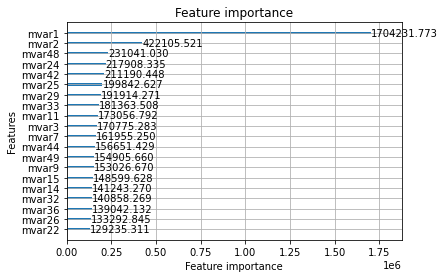

In [62]:
lightgbm.plot_importance(lgbm_model, max_num_features = 20, importance_type = 'gain')
plt.show()

## Tuning LightGBM

In [25]:
boosts = ['goss', 'gbdt']
f_scores = []

for el in boosts:
    
    tune_boost_lgbm = LGBMClassifier(boosting_type = el,
                            learning_rate = 0.003,
                            n_estimators = 3000,
                            num_leaves = 50,
                            max_depth = -1,
                            objective = 'binary',
                            class_weight = 'balanced'
                            )
    
    tune_boost_lgbm.fit(X_train, y_train)
    
    y_train_pred = tune_boost_lgbm.predict(X_train)
    y_test_pred = tune_boost_lgbm.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

goss - Train: 0.6611660593440916 Test: 0.5980633908702714
gbdt - Train: 0.6652598671355998 Test: 0.5951054034407561


Best boosting method seems to be **GOSS**

In [28]:
lrs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
f_scores = []

for el in lrs:
    
    tune_lr_lgbm = LGBMClassifier(boosting_type = 'goss',
                            learning_rate = el,
                            n_estimators = 3000,
                            objective = 'binary',
                            class_weight = 'balanced'
                            )
    
    tune_lr_lgbm.fit(X_train, y_train)
    
    y_train_pred = tune_lr_lgbm.predict(X_train)
    y_test_pred = tune_lr_lgbm.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

0.001 - Train: 0.6063800416635293 Test: 0.5933232169954477
0.003 - Train: 0.6349116535068542 Test: 0.5983801810385897
0.01 - Train: 0.720207112685652 Test: 0.5934244182419366
0.03 - Train: 0.8893802734943265 Test: 0.5722334004024145
0.1 - Train: 0.992414552161109 Test: 0.5310119695321002
0.3 - Train: 1.0 Test: 0.5056694450702109


Best LR seems to be between **0.001 - 0.01**. We can also attempt LR decay (later)

In [29]:
# lrs = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
ests = [1000, 2000, 3000, 4000, 5000, 6000]
f_scores = []

for el in ests:
    
    tune_est_lgbm = LGBMClassifier(boosting_type = 'goss',
                            learning_rate = 0.003,
                            n_estimators = el,
                            objective = 'binary',
                            class_weight = 'balanced'
                            )
    
    tune_est_lgbm.fit(X_train, y_train)
    
    y_train_pred = tune_est_lgbm.predict(X_train)
    y_test_pred = tune_est_lgbm.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

1000 - Train: 0.6063325728897692 Test: 0.591982234689107
2000 - Train: 0.6210266459674751 Test: 0.5965989607935758
3000 - Train: 0.6349116535068542 Test: 0.5983801810385897
4000 - Train: 0.6482737121034995 Test: 0.5980309761075759
5000 - Train: 0.6605889133396207 Test: 0.5987430505197003


KeyboardInterrupt: 

In [ ]:
lrs = [0.001, 0.002, 0.003, 0.004, 0.005]
ests = [2000, 2500, 3000, 3500, 4000, 4500, 5000]
f_scores = []

for el1 in ests:
    for el2 in lrs:
    
        tune_est_lgbm = LGBMClassifier(boosting_type = 'goss',
                                learning_rate = el2,
                                n_estimators = el1,
                                objective = 'binary',
                                class_weight = 'balanced'
                                )

        tune_est_lgbm.fit(X_train, y_train)

        y_train_pred = tune_est_lgbm.predict(X_train)
        y_test_pred = tune_est_lgbm.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

#         f_scores.append([el, train_f, test_f])
        print(el1, el2,"- Train:", train_f, "Test:", test_f)

Overall best performance seems to be given by learning rate of **0.003**

In [30]:
ests = [2500, 2625, 2750, 2875, 3000, 3125, 3250, 3375, 3500]
f_scores = []

for el in ests:
    
    tune_est_lgbm = LGBMClassifier(boosting_type = 'goss',
                            learning_rate = 0.003,
                            n_estimators = el,
                            objective = 'binary',
                            class_weight = 'balanced'
                            )

    tune_est_lgbm.fit(X_train, y_train)

    y_train_pred = tune_est_lgbm.predict(X_train)
    y_test_pred = tune_est_lgbm.predict(X_test)

    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)

    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

2500 - Train: 0.6282484141600164 Test: 0.5980642479662727
2625 - Train: 0.6300660962238049 Test: 0.5983606557377049
2750 - Train: 0.6316707717569786 Test: 0.5977640342530922
2875 - Train: 0.6332288401253918 Test: 0.5976546222989464
3000 - Train: 0.6349116535068542 Test: 0.5983801810385897
3125 - Train: 0.6370126021183928 Test: 0.5985923893594177
3250 - Train: 0.6382901835264966 Test: 0.5984364743092438
3375 - Train: 0.6394438270488202 Test: 0.5979911515006576
3500 - Train: 0.6411463452485645 Test: 0.5975704625695648


Let us fix **n_est = 3000** and **lr = 0.003** for all future experiments.

#### L2 Regularization across various num_leaves

In [116]:
leaves = [30, 35, 40, 45, 50, 55, 60]
regs = [1.0, 2.0, 3.0, 4.0, 5.0]
f_scores = []

for el1 in regs:
    print('***************************')
    print('L2 lambda: ',el1)
    print('***************************')
    for el2 in leaves:

        tune_reg_lgbm = LGBMClassifier(boosting_type = 'goss',
                                learning_rate = 0.003,
                                n_estimators = 3500,
                                objective = 'binary',
                                num_leaves = el2,
                                max_depth = -1,
                                is_unbalance = True,
                                reg_lambda = el1,
                                colsample_bytree = 0.90
                                )

        tune_reg_lgbm.fit(X_train, y_train)

        y_train_pred = tune_reg_lgbm.predict(X_train)
        y_test_pred = tune_reg_lgbm.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

        f_scores.append([el, train_f, test_f])
        print(el2,"- Train:", train_f, "Test:", test_f, (train_f-test_f)/(test_f))

***************************
L2 lambda:  1.0
***************************
30 - Train: 0.6399422546466964 Test: 0.6002625925041776 0.06610383961623043
35 - Train: 0.6476190476190475 Test: 0.5981341944743452 0.08273202502356647
40 - Train: 0.6557947492793893 Test: 0.5998204130499851 0.09331849168784398
45 - Train: 0.6623556100232068 Test: 0.6000360382004924 0.10385971484247954
50 - Train: 0.6701685613484908 Test: 0.5975932611311673 0.12144598163631862
55 - Train: 0.6778790736665619 Test: 0.5994431666868417 0.13084794579149195
60 - Train: 0.6859712797853874 Test: 0.5994800798017049 0.14427702086830294
***************************
L2 lambda:  2.0
***************************
30 - Train: 0.6389662643144538 Test: 0.5981386469395059 0.06825778201065995
35 - Train: 0.6465974684854916 Test: 0.5985645933014354 0.08024676989182848
40 - Train: 0.6548144303140411 Test: 0.5984431137724552 0.09419661659440506
45 - Train: 0.6625862742544602 Test: 0.5993391408831481 0.10552812098691751
50 - Train: 0.669539

We use 40 leaves from now on due to better overall performance

#### L2 Regularization across various num_estimators

In [32]:
regs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
ests = [2000, 3000, 4000, 5000]
f_scores = []

for el1 in ests:
    print('***************************')
    print('Depth: ',el1)
    print('***************************')
    for el2 in regs:

        tune_reg_lgbm = LGBMClassifier(boosting_type = 'goss',
                                learning_rate = 0.003,
                                n_estimators = el1,
                                objective = 'binary',
                                num_leaves = 40,
                                max_depth = -1,
                                is_unbalance = True,
                                reg_lambda = 4*el2
                                )

        tune_reg_lgbm.fit(X_train, y_train)

        y_train_pred = tune_reg_lgbm.predict(X_train)
        y_test_pred = tune_reg_lgbm.predict(X_test)

        train_f = f1_score(y_train, y_train_pred)
        test_f = f1_score(y_test, y_test_pred)

        f_scores.append([el, train_f, test_f])
        print(4*el2,"- Train:", train_f, "Test:", test_f)

***************************
Depth:  2000
***************************
0.0 - Train: 0.6302563841174372 Test: 0.5971754417065532
2.0 - Train: 0.6293702732296097 Test: 0.599020706742965
4.0 - Train: 0.6295165394402036 Test: 0.5966694224636825
6.0 - Train: 0.629272389484132 Test: 0.5981584228544445
8.0 - Train: 0.630227532731664 Test: 0.5964353163361662
10.0 - Train: 0.6291345198991675 Test: 0.5971910775404226
12.0 - Train: 0.6299725302675755 Test: 0.5977215040434449
14.0 - Train: 0.629264324571661 Test: 0.5984066096193568
16.0 - Train: 0.6292785810484588 Test: 0.5971575160700595
***************************
Depth:  3000
***************************
0.0 - Train: 0.6481940144478844 Test: 0.5996420047732697
2.0 - Train: 0.6468056593562354 Test: 0.6005966587112171
4.0 - Train: 0.6463512016691997 Test: 0.6001906123421491
6.0 - Train: 0.6470300219043937 Test: 0.5993434795583408
8.0 - Train: 0.646592546839613 Test: 0.599058009896858
10.0 - Train: 0.6459218078398065 Test: 0.5975326300733059
12.0 - T

#### Tuning the value of $\lambda$

In [33]:
regs = [0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00]

for el in regs:

    tune_reg_lgbm = LGBMClassifier(boosting_type = 'goss',
                            learning_rate = 0.003,
                            n_estimators = 3000,
                            objective = 'binary',
                            num_leaves = 40,
                            max_depth = -1,
                            is_unbalance = True,
                            reg_lambda = el
                            )

    tune_reg_lgbm.fit(X_train, y_train)

    y_train_pred = tune_reg_lgbm.predict(X_train)
    y_test_pred = tune_reg_lgbm.predict(X_test)

    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)

    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

0.0 - Train: 0.6481940144478844 Test: 0.5996420047732697
0.25 - Train: 0.6477586518361764 Test: 0.6005013129625209
0.5 - Train: 0.6467374497474486 Test: 0.5980784149907501
0.75 - Train: 0.6474110784161892 Test: 0.5999880718077175
1.0 - Train: 0.6465746355308992 Test: 0.5987716892254487
1.25 - Train: 0.6475762969842376 Test: 0.5989158277238339
1.5 - Train: 0.647758887171561 Test: 0.599165673420739
1.75 - Train: 0.6467433345366407 Test: 0.5977903851896088
2.0 - Train: 0.6468056593562354 Test: 0.6005966587112171
2.25 - Train: 0.6477703556598665 Test: 0.5982783357245337
2.5 - Train: 0.6468981863149218 Test: 0.5985331822789339
2.75 - Train: 0.6467538497252959 Test: 0.5996066980513676
3.0 - Train: 0.6458097103391403 Test: 0.5999166120674251
3.25 - Train: 0.6468738724808 Test: 0.598343561937675
3.5 - Train: 0.6483018089986085 Test: 0.5993909356899744
3.75 - Train: 0.6475061219229281 Test: 0.5994631673128541
4.0 - Train: 0.6463512016691997 Test: 0.6001906123421491


As a summary we keep **num_leaves = 40**, **num_estimators = 3000** and **$\lambda=3.0$** 

#### Attemping to set colsample_bytree

In [37]:
sam = [0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925, 0.950, 0.975, 1.000]
f_scores = []

for el in sam:
    
    tune_est_lgbm = LGBMClassifier(boosting_type = 'goss',
                                learning_rate = 0.003,
                                n_estimators = 3000,
                                objective = 'binary',
                                num_leaves = 40,
                                max_depth = -1,
                                is_unbalance = True,
                                reg_lambda = 3,
                                colsample_bytree = el
                                )

    tune_est_lgbm.fit(X_train, y_train)

    y_train_pred = tune_est_lgbm.predict(X_train)
    y_test_pred = tune_est_lgbm.predict(X_test)

    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)

    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

0.75 - Train: 0.6449254845435125 Test: 0.5987132133921125
0.775 - Train: 0.6449771102309552 Test: 0.5997855355653521
0.8 - Train: 0.6460334217370034 Test: 0.5986783354170387
0.825 - Train: 0.6455748339597385 Test: 0.5991546109424303
0.85 - Train: 0.6460737840065952 Test: 0.5980082294710477
0.875 - Train: 0.6460129171705735 Test: 0.5995346894947206
0.9 - Train: 0.6458392355834855 Test: 0.6013960980848398
0.925 - Train: 0.6464235081840444 Test: 0.5983405957142005
0.95 - Train: 0.6465286361763495 Test: 0.5985697258641238
0.975 - Train: 0.6460610435141266 Test: 0.5987709563868504
1.0 - Train: 0.6458097103391403 Test: 0.5999166120674251


We set colsample_bytree to be **0.90**

#### Regularising using min_split_gain 

In [39]:
gain = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70]
f_scores = []

for el in gain:
    
    tune_est_lgbm = LGBMClassifier(boosting_type = 'goss',
                                learning_rate = 0.003,
                                n_estimators = 3000,
                                objective = 'binary',
                                num_leaves = 40,
                                max_depth = -1,
                                is_unbalance = True,
                                reg_lambda = 3,
                                colsample_bytree = 0.9,
                                min_split_gain = el
                                )

    tune_est_lgbm.fit(X_train, y_train)

    y_train_pred = tune_est_lgbm.predict(X_train)
    y_test_pred = tune_est_lgbm.predict(X_test)

    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)

    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

0.0 - Train: 0.6589583387343478 Test: 0.5992576628352491
0.05 - Train: 0.6596511236100671 Test: 0.597892467967908
0.1 - Train: 0.659169819142872 Test: 0.5974492545356566
0.15 - Train: 0.6582908064140094 Test: 0.5988734419942474
0.2 - Train: 0.6591480646081253 Test: 0.5985156811108452
0.25 - Train: 0.6587188704129923 Test: 0.5979875419262097
0.3 - Train: 0.6587936705254707 Test: 0.6002395209580839
0.35 - Train: 0.6589490586072048 Test: 0.5986964061472225
0.4 - Train: 0.6599497526483463 Test: 0.59962845328699
0.45 - Train: 0.65943870934274 Test: 0.5995807127882601
0.5 - Train: 0.6592462207496377 Test: 0.5978839141610378
0.55 - Train: 0.6592893979837768 Test: 0.5984327331458994
0.6 - Train: 0.6595942868971227 Test: 0.5992348158775707
0.65 - Train: 0.659365128683134 Test: 0.598660607510165
0.7 - Train: 0.6589861751152074 Test: 0.6001677450275581


#### L1 Regularization

In [40]:
alph = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
f_scores = []

for el in alph:
    
    tune_est_lgbm = LGBMClassifier(boosting_type = 'goss',
                                learning_rate = 0.003,
                                n_estimators = 3000,
                                objective = 'binary',
                                num_leaves = 40,
                                max_depth = -1,
                                is_unbalance = True,
                                reg_lambda = 3,
                                reg_alpha = el,
                                colsample_bytree = 0.9,
                                min_split_gain = 0.0,
                                )

    tune_est_lgbm.fit(X_train, y_train)

    y_train_pred = tune_est_lgbm.predict(X_train)
    y_test_pred = tune_est_lgbm.predict(X_test)

    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)

    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

0.0 - Train: 0.6458392355834855 Test: 0.6013960980848398
0.5 - Train: 0.6475454194047159 Test: 0.5988902810094863
1.0 - Train: 0.645950890211538 Test: 0.5987359885523492
1.5 - Train: 0.6462323734886959 Test: 0.5997021149836163
2.0 - Train: 0.6467272399680831 Test: 0.6002624358821425
2.5 - Train: 0.6453208315087194 Test: 0.5986142635288496
3.0 - Train: 0.6456810460207969 Test: 0.5996308864678217
3.5 - Train: 0.6460778258184066 Test: 0.5987845567206864
4.0 - Train: 0.6455917967743598 Test: 0.5990921036913153
4.5 - Train: 0.6463210487007134 Test: 0.5982956915559263
5.0 - Train: 0.6463486833637931 Test: 0.5974955277280858
5.5 - Train: 0.646300347445631 Test: 0.5980550086510351
6.0 - Train: 0.6451230816767948 Test: 0.5985584082921307


Range of values between 1.5 and 2.5 for L1 regularisation usually gives best results. Let us now refine further.

In [42]:
alph = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
f_scores = []

for el in alph:
    
    tune_est_lgbm = LGBMClassifier(boosting_type = 'goss',
                                learning_rate = 0.003,
                                n_estimators = 3000,
                                objective = 'binary',
                                num_leaves = 40,
                                max_depth = -1,
                                is_unbalance = True,
                                reg_lambda = 3,
                                reg_alpha = el,
                                colsample_bytree = 0.9,
                                min_split_gain = 0.0,
                                )

    tune_est_lgbm.fit(X_train, y_train)

    y_train_pred = tune_est_lgbm.predict(X_train)
    y_test_pred = tune_est_lgbm.predict(X_test)

    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)

    f_scores.append([el, train_f, test_f])
    print(el,"- Train:", train_f, "Test:", test_f)

1.5 - Train: 0.6457382922240263 Test: 0.5987344794651385
1.6 - Train: 0.6465994897301754 Test: 0.5990234607597952
1.7 - Train: 0.6467784733493057 Test: 0.5983069035411946
1.8 - Train: 0.6457517013817282 Test: 0.5971128608923884
1.9 - Train: 0.6453421099997428 Test: 0.5997851515874911
2.0 - Train: 0.6461894953656026 Test: 0.5982132221560453
2.1 - Train: 0.646553055655666 Test: 0.5987617573520657
2.2 - Train: 0.6459422566770546 Test: 0.5984862029918351


KeyboardInterrupt: 

We use L1 regularization **$\alpha = 2.5$**

In [44]:
tune_lgbm = LGBMClassifier(boosting_type = 'goss',
                           learning_rate = 0.003,
                           n_estimators = 3000,
                           objective = 'binary',
                           num_leaves = 40,
                           max_depth = -1,
                           is_unbalance = True,
                           reg_lambda = 3,
                           reg_alpha = 0,
                           colsample_bytree = 0.9,
                           min_split_gain = 0.0,
                           )

tune_lgbm.fit(X_train, y_train)

y_train_pred = tune_lgbm.predict(X_train)
y_test_pred = tune_lgbm.predict(X_test)

train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)

f_scores.append([el, train_f, test_f])
print(f1_score(y_train_pred, y_train))
print(f1_score(y_test_pred, y_test))

0.6458392355834855
0.6013960980848398


# Random Forests Classifier

## Combining LightGBM and XGBoost

In [119]:
xgb1 = XGBClassifier(learning_rate = 0.01,  
                      colsample_bytree = 0.25,
                      subsample = 0.50,
                      objective = 'binary:logistic', 
                      n_estimators = 3000,
                      max_depth = 14, 
                      scale_pos_weight = 5,
                      gamma = 4,
                      reg_lambda = 8,
                      verbosity = 2,
                      tree_method = 'gpu_hist')

xgb1.fit(X_train, y_train)
y_pred01 = xgb1.predict(X_train)
y_pred11 = xgb1.predict(X_test)
print(f1_score(y_pred01, y_train))
print(f1_score(y_pred11, y_test))

0.8409279830726214
0.5959990802483329


In [69]:
lgbm1 = LGBMClassifier(boosting_type = 'goss',
                       learning_rate = 0.003,
                       n_estimators = 3000,
                       objective = 'binary',
                       num_leaves = 40,
                       max_depth = -1,
                       is_unbalance = True,
                       reg_lambda = 3,
                       reg_alpha = 0,
                       colsample_bytree = 0.9,
                       min_split_gain = 0.0,
                       )

lgbm1.fit(X_train, y_train)
y_pred02 = lgbm1.predict(X_train)
y_pred12 = lgbm1.predict(X_test)
print(f1_score(y_pred02, y_train))
print(f1_score(y_pred12, y_test))

0.6458392355834855
0.6013960980848398


In [168]:
lgbm2 = LGBMClassifier(boosting_type = 'goss',
                       learning_rate = 0.003,
                       n_estimators = 4000,
                       objective = 'binary',
                       num_leaves = 40,
                       max_depth = -1,
                       is_unbalance = True,
                       reg_lambda = 3,
                       reg_alpha = 0,
                       colsample_bytree = 0.9,
                       min_split_gain = 0.0,
                       )

lgbm2.fit(X_train, y_train)
y_pred03 = lgbm2.predict(X_train)
y_pred13 = lgbm2.predict(X_test)
print(f1_score(y_pred03, y_train))
print(f1_score(y_pred13, y_test))

0.662406426876027
0.6008909222248977


In [169]:
lgbm3 = LGBMClassifier(boosting_type = 'goss',
                       learning_rate = 0.003,
                       n_estimators = 3000,
                       objective = 'binary',
                       num_leaves = 50,
                       max_depth = -1,
                       is_unbalance = True,
                       reg_lambda = 4,
                       reg_alpha = 0,
                       colsample_bytree = 0.9,
                       min_split_gain = 0.0,
                       )

lgbm3.fit(X_train, y_train)
y_pred04 = lgbm3.predict(X_train)
y_pred14 = lgbm3.predict(X_test)
print(f1_score(y_pred04, y_train))
print(f1_score(y_pred14, y_test))

0.6592740368422416
0.5997487587485794


In [190]:
y_pred0 = []
for i in range(len(y_pred01)):
    y_pred0.append((2*y_pred01[i] + y_pred02[i] + y_pred03[i] + y_pred04[i])//3)
y_pred0 = np.array(y_pred0)

y_pred1 = []
for i in range(len(y_pred11)):
    y_pred1.append((2*y_pred11[i] + y_pred12[i] + y_pred13[i] + y_pred14[i])//3)
y_pred1 = np.array(y_pred1)

In [191]:
[f1_score(y_train, y_pred0), f1_score(y_test, y_pred1)]

[0.670183043058203, 0.6016832806064585]

## Generating the Output file

In [192]:
df_test = pd.read_csv('TestX.csv', index_col = 'application_key',low_memory = False)
df_test

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
application_key,,,,,,,,,,,,,,,,,,,,,
578069,1719,0.6174,8.623,0.000,0.000,258,258,258,10729,307,...,0.54545,2,0.91837,0,0,C,3247,554,4,2216
578070,1795,0.2051,0.000,0.000,0.000,1685,12711,8913,80519,18099,...,0.17241,4,0.94563,0,0,C,18,554,4,2216
578071,1742,0.5082,0.000,0.000,0.000,1185,8954,8954,1189,1185,...,0.64706,1,0.97054,0,0,C,11,404,4,1616
578072,1685,0.2595,25.409,0.000,0.000,missing,3354,missing,missing,3354,...,0.85714,1,1.00000,na,0,C,32,528,4,2112
578073,1666,1.2678,0.000,0.000,0.000,570,570,570,missing,570,...,missing,0,0.99617,na,0,L,89,419,4,1676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310027,1736,2.1740,0.000,0.000,0.000,11,4248,1577,13379,6671,...,0,4,0.43829,na,0,C,19,383,4,1532
310028,1724,0.0000,1.108,0.768,0.000,missing,64041,missing,10926,84839,...,0.16667,14,0.57931,0,0,C,5,595,4,2380
310029,1605,0.2901,11.561,0.937,2.976,missing,2277,missing,3964,5709,...,0.5,4,0.42069,na,0,C,22,835,4,3340


In [193]:
for i in range(51):
    lol = ['na', 'missing', '#VALUE!']
    for el in lol:
        df_test = df_test.replace(el, np.NaN)
    lol = get_non_numeric(list(df_test.iloc[:, i].unique()))

df_test = pd.get_dummies(df_test, columns = ['mvar47'], prefix = ['type'])
for i in range(51):
    lol = get_non_numeric(list(df_test.iloc[:, i].unique()))
    print(i,lol)

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 []
46 []
47 []
48 []
49 []
50 []


In [194]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47000 entries, 578069 to 310031
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mvar1   44772 non-null  object 
 1   mvar2   43673 non-null  float64
 2   mvar3   46706 non-null  float64
 3   mvar4   46706 non-null  float64
 4   mvar5   46706 non-null  float64
 5   mvar6   35703 non-null  object 
 6   mvar7   42521 non-null  object 
 7   mvar8   35698 non-null  object 
 8   mvar9   40188 non-null  object 
 9   mvar10  46705 non-null  object 
 10  mvar11  20482 non-null  object 
 11  mvar12  38603 non-null  object 
 12  mvar13  41193 non-null  object 
 13  mvar14  47000 non-null  int64  
 14  mvar15  28164 non-null  object 
 15  mvar16  35967 non-null  object 
 16  mvar17  37568 non-null  object 
 17  mvar18  38215 non-null  object 
 18  mvar19  46993 non-null  object 
 19  mvar20  46705 non-null  object 
 20  mvar21  33620 non-null  float64
 21  mvar22  29632 non-null  float

In [195]:
df_test_imputed = df_test
df_test_imputed = pd.DataFrame(df_test_imputed, columns = df_test.columns)
df_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47000 entries, 578069 to 310031
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mvar1   44772 non-null  object 
 1   mvar2   43673 non-null  float64
 2   mvar3   46706 non-null  float64
 3   mvar4   46706 non-null  float64
 4   mvar5   46706 non-null  float64
 5   mvar6   35703 non-null  object 
 6   mvar7   42521 non-null  object 
 7   mvar8   35698 non-null  object 
 8   mvar9   40188 non-null  object 
 9   mvar10  46705 non-null  object 
 10  mvar11  20482 non-null  object 
 11  mvar12  38603 non-null  object 
 12  mvar13  41193 non-null  object 
 13  mvar14  47000 non-null  int64  
 14  mvar15  28164 non-null  object 
 15  mvar16  35967 non-null  object 
 16  mvar17  37568 non-null  object 
 17  mvar18  38215 non-null  object 
 18  mvar19  46993 non-null  object 
 19  mvar20  46705 non-null  object 
 20  mvar21  33620 non-null  float64
 21  mvar22  29632 non-null  float

In [196]:
non_label_cols = list(df_test_imputed.columns)
test = np.array(df_test_imputed[non_label_cols])

In [197]:
test

array([['1719', 0.6174, 8.623, ..., '2216', 1, 0],
       ['1795', 0.2051, 0.0, ..., '2216', 1, 0],
       ['1742', 0.5082, 0.0, ..., '1616', 1, 0],
       ...,
       ['1605', 0.2901, 11.561, ..., '3340', 1, 0],
       ['1780', 1.1874, 0.0, ..., '1796', 0, 1],
       ['1727', 1.9288, 1.441, ..., '2448', 1, 0]], dtype=object)

In [198]:
xgb1.fit(X, y)
lgbm1.fit(X, y)
lgbm2.fit(X, y)
lgbm3.fit(X, y)

LGBMClassifier(boosting_type='goss', colsample_bytree=0.9, is_unbalance=True,
               learning_rate=0.003, n_estimators=3000, num_leaves=50,
               objective='binary', reg_alpha=0, reg_lambda=4)

In [199]:
pred1 = xgb1.predict(test)
pred2 = lgbm1.predict(test)
pred3 = lgbm2.predict(test)
pred4 = lgbm3.predict(test)

In [200]:
preds = []
for i in range(len(pred2)):
    preds.append((2*pred1[i] + pred2[i] + pred3[i] + pred4[i])//3)
preds = np.array(preds)

In [201]:
column = pd.DataFrame(df_test.index)['application_key']

In [202]:
Y_pred_df = pd.DataFrame(preds, columns = ['Predicted'])
Y_pred_df.insert(0, 'Application key', column)
Y_pred_df.to_csv('winners_pothumukku_17.csv', header=False, index=False)

In [203]:
preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

#### Tuning XGBoost

In [146]:
tuning_xgb_model = XGBClassifier()

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc"]
%time tuning_xgb_model.fit(X_train, y_train, eval_metric = f1_score, eval_set = eval_set, verbose=True)

C:\Users\Vishnu\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


TypeError: Expected sequence or array-like, got <class 'xgboost.core.DMatrix'>

In [50]:
results = tuning_xgb_model.evals_result()

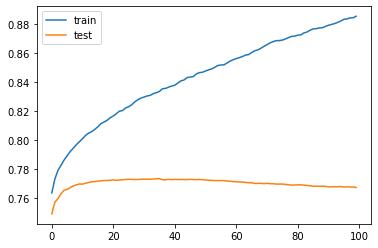

In [51]:
plt.plot(list(range(len(results['validation_0']['auc']))), results['validation_0']['auc'], label = 'train')
plt.plot(list(range(len(results['validation_1']['auc']))), results['validation_1']['auc'], label = 'test')
plt.legend()

In [136]:
basic_xg = XGBClassifier(silent = False, 
                      learning_rate = 0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective = 'binary:logistic', 
                      n_estimators = 1000,
                      max_depth = 3, 
                      gamma = 1)

In [138]:
depths = list(range(3, 10))
f_scores = []

for el in depths:
    
    test_depth_model = XGBClassifier(learning_rate = 0.3,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective = 'binary:logistic', 
                      n_estimators = 100,
                      max_depth = el, 
                      gamma = 1)
    
    test_depth_model.fit(X_train, y_train)
    
    y_train_pred = test_depth_model.predict(X_train)
    y_test_pred = test_depth_model.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([el, train_f, test_f])

[09:11:44] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:12:17] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:13:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:13:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:15:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:17:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:19:15] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [141]:
f_scores = np.array(f_scores)
plt.plot()

array([[0.52022388, 0.50402842],
       [0.53730011, 0.50885529],
       [0.56206591, 0.51342513],
       [0.59723089, 0.5157967 ],
       [0.64112463, 0.51613457],
       [0.69926563, 0.51618982],
       [0.77111622, 0.51649291]])

Pora simaa, ineem venam

In [142]:
depths = list(range(8, 14))
f_scores = []

for el in depths:
    
    test_depth_model = XGBClassifier(silent = False, 
                      learning_rate = 0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective = 'binary:logistic', 
                      n_estimators = 1000,
                      max_depth = el, 
                      gamma = 1)
    
    test_depth_model.fit(X_train, y_train)
    
    y_train_pred = test_depth_model.predict(X_train)
    y_test_pred = test_depth_model.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([train_f, test_f])

[09:25:13] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:26:46] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:29:11] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:32:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:35:24] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[09:39:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [143]:
f_scores

[[0.6992656277986744, 0.5161898235394895],
 [0.7711162175335979, 0.5164929071953512],
 [0.8384882038165115, 0.5185058843595428],
 [0.898757120662869, 0.5165868673050614],
 [0.9424343136640121, 0.5146278870829769],
 [0.9743307664099743, 0.5173771614449582]]

In [144]:
depths[2]

10

<b> Max Depth = 10 is a good choice </b>

In [146]:
col_samples = list(np.linspace(0.4, 0.9, 10))
f_scores = []

for el in col_samples:
    
    test_depth_model = XGBClassifier(silent = False, 
                      learning_rate = 0.01,  
                      colsample_bytree = el,
                      subsample = 0.8,
                      objective = 'binary:logistic', 
                      n_estimators = 1000,
                      max_depth = 10, 
                      gamma = 1)
    
    test_depth_model.fit(X_train, y_train)
    
    y_train_pred = test_depth_model.predict(X_train)
    y_test_pred = test_depth_model.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([train_f, test_f])

[10:16:36] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:17:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:19:34] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:23:11] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:25:10] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:27:17] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:29:32] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:31:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:34:27] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [147]:
f_scores

[[0.7980210351508442, 0.5140548439783375],
 [0.8057420221005887, 0.5164230438521067],
 [0.811027397260274, 0.5170103092783506],
 [0.8163028253219909, 0.516616573636754],
 [0.8194250247246189, 0.5178021225607669],
 [0.8207505368281126, 0.5147817119284978],
 [0.8251121076233184, 0.5173479903813122],
 [0.8268376242325566, 0.5125740279804308],
 [0.832088669617815, 0.516884671283235],
 [0.8334514528703048, 0.5166881166881166]]

In [151]:
col_samples[4]

0.6222222222222222

<b> 0.6 for columns used by each tree </b>

In [152]:
estimator_samples = list(range(500, 4001, 500))
f_scores = []

for el in estimator_samples:
    
    test_depth_model = XGBClassifier(silent = False, 
                      learning_rate = 0.01,  
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective = 'binary:logistic', 
                      n_estimators = el,
                      max_depth = 10, 
                      gamma = 1)
    
    test_depth_model.fit(X_train, y_train)
    
    y_train_pred = test_depth_model.predict(X_train)
    y_test_pred = test_depth_model.predict(X_test)
    
    train_f = f1_score(y_train, y_train_pred)
    test_f = f1_score(y_test, y_test_pred)
    
    f_scores.append([train_f, test_f])

[10:43:34] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:44:21] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:46:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:48:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:52:47] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[10:57:31] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:03:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[11:09:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [153]:
f_scores

[[0.7292857142857144, 0.5109287257019439],
 [0.8185228125213121, 0.5159241136578248],
 [0.8780007870916962, 0.5160572064742656],
 [0.9200560117115396, 0.5157318741450068],
 [0.947568578553616, 0.5172619555025147],
 [0.9682880451450653, 0.5178753830439223],
 [0.9805577495595116, 0.5171679304762716],
 [0.986970585567883, 0.518253765636967]]

In [154]:
estimator_samples[5]

3000

Confused unga bunga, but <b> n_est = 3000 for now </b>